# Kruskal-Wallis test

### Overview

This Python script is designed for statistical analysis and visualization of cellular data across different experimental groups of mice. The script loads pre-saved data, performs group-wise comparisons using non-parametric statistical tests, and visualizes the data using boxplots. It handles multiple datasets, including those with different experimental conditions, and tests for significant differences in metrics such as the number of cells, energy, density, and relative density between groups.

### Key Features
- **Data Loading:** The script loads multiple datasets stored as `.npy` files, which contain dictionaries of results for different groups of mice.
- **Boxplot Visualization:** It provides a function for generating boxplots of various metrics (e.g., cell count, energy) across experimental groups.
- **Statistical Testing:** For each metric, non-parametric Kruskal-Wallis tests are performed to assess differences across groups.
- **Analysis across Experimental Conditions:** The script processes multiple experimental datasets, with and without certain variables (e.g., father involvement), and applies the same set of analyses for comparison.
- **Per-Area Analysis:** It performs Kruskal-Wallis tests on a per-area basis for a detailed view of statistical differences at specific levels (e.g., brain regions or other categorized levels).

### Detailed Breakdown

 1. **Library Imports**
The script begins by importing various libraries for data manipulation, statistical analysis, and visualization:
- **Pandas:** For handling data frames.
- **Seaborn and Matplotlib:** For data visualization, particularly for creating boxplots.
- **NumPy:** For array manipulation and loading data.
- **Scipy Stats:** For statistical testing (e.g., Kruskal-Wallis, Mann-Whitney U tests).
- **Custom Modules:** It uses custom modules such as `analyze_cells_energy` (abbreviated as `ace`), `utils`, and `utils_PLS` for various data processing tasks.

2. **`boxplot` Function**
- **Purpose:** Creates a boxplot for a specified metric (`value`) across experimental groups.
- **Inputs:**
  - `dfs`: A list of DataFrames containing the data.
  - `value`: The column to plot.
- **Outputs:** Returns the figure and axis objects of the plot, allowing further customization if needed.
- **How it works:**
  - Combines multiple DataFrames into one.
  - Plots the specified value on the y-axis and groups data on the x-axis.
  - Rotates the x-axis labels for better readability.

3. **Main Workflow**
- **Data Loading:** It loads multiple datasets using `numpy.load()`. These files store the results of experimental observations across different groups of mice.
- **Subject Grouping:** The function `utils.divide_in_exp_groups` is used to divide the loaded subjects into experimental groups for comparison.
  
- **Boxplot Generation:**
  - For each dataset, the `boxplot` function visualizes the distribution of `n_cells` across the groups.
  
- **Statistical Analysis:**
  - For each metric (`n_cells`, `energy`, `density`, `relative_density`), a Kruskal-Wallis test is performed. This non-parametric test is used to determine if there are statistically significant differences between the groups.
  - The script prints the results of these tests.

4. **Analysis across Different Conditions**
The script is structured to repeat the same analysis for several experimental conditions:
- Mice with and without father involvement.
- Different datasets (`c57` e.g. c57 with father, `BL` e.g. c57 without father, `WILD` both groups) are analyzed separately.
The function `ace.kruskal_per_area` applies the Kruskal-Wallis test at a more granular level (e.g., across brain regions) to identify area-specific differences.

 5. **Example Datasets**
- **`dict_results_across_mice_c57_merged_hemispheres_F6BL48.npy`:** Dataset of C57 mice with father.
- **`dict_results_across_mice_BL_woF2000_36.npy`:** Dataset of BL mice without father.
- **`dict_results_across_mice_WILD_with_father2500_newwild.npy`:** Dataset of wild mice with father involvement.
- **`dict_results_across_mice_WILD_without_father2500.npy`:** Dataset of wild mice without father involvement.

6. **Per-Area Analysis**
The final part of the script uses `ace.kruskal_per_area` to conduct area-specific Kruskal-Wallis tests for `n_cells` across the different experimental groups.
- Results from different experimental conditions (with and without father involvement) are compared.


In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu, f_oneway, kruskal
import networkx as nx
import matplotlib.pyplot as plt
import utils_PLS as upls
import scikit_posthocs as sp

In [2]:
def boxplot(dfs, value):
    """
    Create a boxplot for a specified value across different groups.

    This function takes a list of DataFrames, concatenates them into a single DataFrame,
    and creates a boxplot for the specified value, categorized by experimental groups.

    Parameters:
    dfs (list of pd.DataFrame): List of DataFrames containing the data to be plotted.
    value (str): The column name in the DataFrames that contains the values to be plotted.

    Returns:
    tuple: The figure and axis of the created plot.
    """
    # Concatenate all DataFrames into a single DataFrame
    df = pd.concat(dfs, ignore_index=True)

    # Create a figure and axis for the boxplot
    f, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5), sharey=True)

    # Generate the boxplot
    sns.boxplot(
        data=df,
        x="group",  # Grouping variable on the x-axis
        y=value,    # Variable to be plotted on the y-axis
        palette="Accent",  # Color palette
        ax=ax  # Axis to plot on
    )

    # Remove x-axis label
    ax.set_xlabel('')

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', labelrotation=90)

    return f, ax

# c57 with father

n_cells
KruskalResult(statistic=0.9200108533442091, pvalue=0.6312802197468721)
energy
KruskalResult(statistic=0.9140415140415286, pvalue=0.6331671972616968)
density
KruskalResult(statistic=3.061809795143134, pvalue=0.21633981334375155)
relative_density
KruskalResult(statistic=4.084981684981699, pvalue=0.12970523287396482)


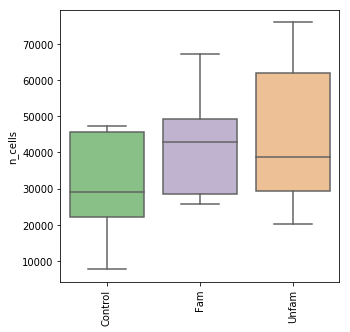

In [3]:
dict_results_across_mice = np.load(
    'dict_results/newvolumes/dict_results_across_mice_c57_merged_hemispheres_F6BL48.npy', 
                                   allow_pickle=True).item()

subjects = list(dict_results_across_mice.keys())

experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)

boxplot(ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
        experimental_groups=experimental_groups, 
        value='n_cells'), value='n_cells')

for value in ['n_cells', 'energy', 'density', 'relative_density']:
    print(value)
    df = ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
            experimental_groups=experimental_groups, 
            value=value)
    
    print(kruskal(*[df[key][value].to_numpy() for key in df.keys()]))

# c57 without father

n_cells
KruskalResult(statistic=2.0968253968253947, pvalue=0.3504936469278033)
energy
KruskalResult(statistic=2.017857142857139, pvalue=0.36460942332143703)
density
KruskalResult(statistic=1.8589065255731896, pvalue=0.3947694865488062)
relative_density
KruskalResult(statistic=2.3033509700176324, pvalue=0.31610669340989317)


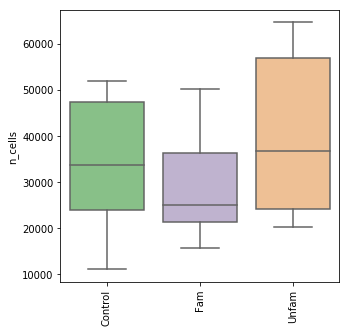

In [4]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_BL_woF2000_36.npy', 
                                   allow_pickle=True).item()

del dict_results_across_mice['BL19Unfam']

subjects = list(dict_results_across_mice.keys())

experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)

boxplot(ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
        experimental_groups=experimental_groups, 
        value='n_cells'), value='n_cells')

for value in ['n_cells', 'energy', 'density', 'relative_density']:
    print(value)
    df = ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
            experimental_groups=experimental_groups, 
            value=value)
    print(kruskal(*[df[key][value].to_numpy() for key in df.keys()]))

# WILD with father

n_cells
KruskalResult(statistic=0.8800219780219862, pvalue=0.6440293437987165)
energy
KruskalResult(statistic=0.2967032967032992, pvalue=0.8621278957784488)
density
KruskalResult(statistic=0.41558241758242787, pvalue=0.8123766361057339)
relative_density
KruskalResult(statistic=0.5856923076923266, pvalue=0.746136922163362)


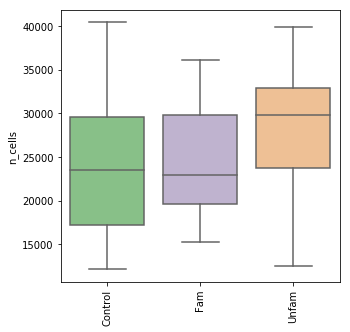

In [5]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_with_father2500_newwild.npy', 
                                   allow_pickle=True).item()

subjects = list(dict_results_across_mice.keys())

experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)

boxplot(ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
        experimental_groups=experimental_groups, 
        value='n_cells'), value='n_cells')

for value in ['n_cells', 'energy', 'density', 'relative_density']:
    print(value)
    df = ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
            experimental_groups=experimental_groups, 
            value=value)
    print(kruskal(*[df[key][value].to_numpy() for key in df.keys()]))

# WILD_without_father

n_cells
KruskalResult(statistic=4.481987577639757, pvalue=0.10635275966048233)
energy
KruskalResult(statistic=2.6269151138716467, pvalue=0.2688887491290317)
density
KruskalResult(statistic=2.163975155279502, pvalue=0.3389212235075171)
relative_density
KruskalResult(statistic=3.8059006211180133, pvalue=0.14912799565384136)


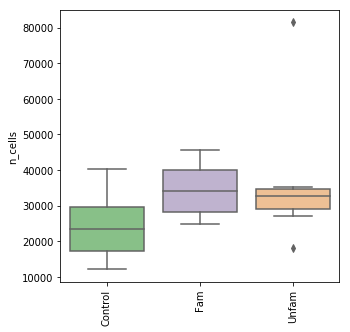

In [6]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_without_father2500.npy', 
                                   allow_pickle=True).item()

subjects = list(dict_results_across_mice.keys())

experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)

boxplot(ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
        experimental_groups=experimental_groups, 
        value='n_cells'), value='n_cells')

for value in ['n_cells', 'energy', 'density', 'relative_density']:
    print(value)
    df = ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
            experimental_groups=experimental_groups, 
            value=value)
    print(kruskal(*[df[key][value].to_numpy() for key in df.keys()]))

# Make kruskal test per area

## c57 with father

In [3]:
results = np.load('dict_results/newvolumes/dict_results_across_mice_c57_merged_hemispheres_F6BL48.npy',
                                    allow_pickle=True).item()

c57_wf = ace.kruskal_per_area(dictionary=results,
                 experimental_groups=utils.divide_in_exp_groups(list_subjects=list(results.keys())),
                 value='n_cells', level=8)
c57_wf

/home/stella/anaconda2/envs/ClearMap/lib/python3.6/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


{'Infralimbic area': (KruskalResult(statistic=6.242515417019528, pvalue=0.0441016664831495),
            Control       Fam     Unfam
  Control  1.000000  0.050894  0.050894
  Fam      0.050894  1.000000  0.803950
  Unfam    0.050894  0.803950  1.000000),
 'Main olfactory bulb': (KruskalResult(statistic=7.539682539682545, pvalue=0.023055722635306922),
           Control      Fam    Unfam
  Control  1.00000  0.02399  0.02399
  Fam      0.02399  1.00000  1.00000
  Unfam    0.02399  1.00000  1.00000),
 'Accessory olfactory bulb': (KruskalResult(statistic=7.861294261294262, pvalue=0.019630964642816575),
           Control       Fam     Unfam
  Control  1.00000  0.021660  0.021660
  Fam      0.02166  1.000000  0.977299
  Unfam    0.02166  0.977299  1.000000),
 'Cortical amygdalar area': (KruskalResult(statistic=12.69744234903264, pvalue=0.001748982349931995),
            Control       Fam     Unfam
  Control  1.000000  0.003027  0.003027
  Fam      0.003027  1.000000  0.816207
  Unfam    0.0

In [5]:
results['BL49Fam']

,area,n_cells,energy,density,relative_density
0,Frontal pole cerebral cortex,27,3.179955e+05,49.493749,0.629810
1,Primary motor area,745,8.340783e+05,125.831864,1.601215
2,Secondary motor area,494,4.831998e+05,72.243291,0.919299
3,Primary somatosensory area,1809,9.691292e+05,144.535266,1.839217
4,Supplemental somatosensory area,675,9.553327e+05,143.052516,1.820348
...,...,...,...,...,...
194,Interfascicular nucleus raphe,2,1.126414e+05,19.711514,0.250830
195,Interpeduncular nucleus,29,5.132276e+05,75.369538,0.959080
196,Rostral linear nucleus raphe,1,1.088539e+05,14.834273,0.188767
197,Central linear nucleus raphe,16,1.157174e+06,168.268836,2.141227


## c57 without father

In [8]:
results = np.load('dict_results/newvolumes/dict_results_across_mice_BL_woF2000_36.npy',
                                    allow_pickle=True).item()
del results['BL19Unfam']

c57_wof = ace.kruskal_per_area(dictionary=results,
                 experimental_groups=utils.divide_in_exp_groups(list_subjects=list(results.keys())),
                 value='n_cells', level=8)
c57_wof

/home/stella/anaconda2/envs/ClearMap/lib/python3.6/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


{'Main olfactory bulb': (KruskalResult(statistic=10.192063492063497, pvalue=0.006120988070681217),
            Control       Fam     Unfam
  Control  1.000000  0.028114  0.006009
  Fam      0.028114  1.000000  0.400408
  Unfam    0.006009  0.400408  1.000000),
 'Accessory olfactory bulb': (KruskalResult(statistic=14.847964603271556, pvalue=0.0005967678974630086),
            Control       Fam     Unfam
  Control  1.000000  0.008328  0.000527
  Fam      0.008328  1.000000  0.269259
  Unfam    0.000527  0.269259  1.000000),
 'Cortical amygdalar area': (KruskalResult(statistic=15.100573192239864, pvalue=0.0005259593675995538),
            Control       Fam     Unfam
  Control  1.000000  0.048006  0.000306
  Fam      0.048006  1.000000  0.048006
  Unfam    0.000306  0.048006  1.000000),
 'Piriform-amygdalar area': (KruskalResult(statistic=11.529782394676996, pvalue=0.003135736521700568),
            Control       Fam     Unfam
  Control  1.000000  0.142064  0.002267
  Fam      0.142064  1.

## wild with father

In [9]:
results = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_with_father2500_newwild.npy',
                                    allow_pickle=True).item()

wild_wf = ace.kruskal_per_area(dictionary=results,
                 experimental_groups=utils.divide_in_exp_groups(list_subjects=list(results.keys())),
                 value='n_cells', level=8)
wild_wf

/home/stella/anaconda2/envs/ClearMap/lib/python3.6/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


{'Cortical amygdalar area': (KruskalResult(statistic=10.257928873742648, pvalue=0.005922690619085436),
            Control       Fam     Unfam
  Control  1.000000  0.049652  0.006361
  Fam      0.049652  1.000000  0.330572
  Unfam    0.006361  0.330572  1.000000),
 'Postpiriform transition area': (KruskalResult(statistic=7.8060046189376555, pvalue=0.020181230101072523),
            Control       Fam     Unfam
  Control  1.000000  0.641463  0.021484
  Fam      0.641463  1.000000  0.049277
  Unfam    0.021484  0.049277  1.000000),
 "Ammon's horn": (KruskalResult(statistic=6.307714285714297, pvalue=0.04268715844988441),
            Control       Fam     Unfam
  Control  1.000000  0.057589  0.856224
  Fam      0.057589  1.000000  0.072627
  Unfam    0.856224  0.072627  1.000000),
 'Posterior amygdalar nucleus': (KruskalResult(statistic=13.680475456746649, pvalue=0.0010698490359350515),
            Control       Fam     Unfam
  Control  1.000000  0.005681  0.002710
  Fam      0.005681  1.00

## wild without father

In [10]:
results = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_without_father2500.npy',
                                    allow_pickle=True).item()

wild_wof = ace.kruskal_per_area(dictionary=results,
                 experimental_groups=utils.divide_in_exp_groups(list_subjects=list(results.keys())),
                 value='n_cells', level=8)
wild_wof

/home/stella/anaconda2/envs/ClearMap/lib/python3.6/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


{'Primary motor area': (KruskalResult(statistic=10.507660455486544, pvalue=0.005227457651766495),
            Control       Fam     Unfam
  Control  1.000000  0.022249  0.010383
  Fam      0.022249  1.000000  0.742824
  Unfam    0.010383  0.742824  1.000000),
 'Secondary motor area': (KruskalResult(statistic=6.9760869565217405, pvalue=0.030560606207097732),
            Control       Fam     Unfam
  Control  1.000000  0.233035  0.025401
  Fam      0.233035  1.000000  0.233035
  Unfam    0.025401  0.233035  1.000000),
 'Agranular insular area': (KruskalResult(statistic=10.841511387163564, pvalue=0.004423802345317263),
            Control       Fam     Unfam
  Control  1.000000  0.159393  0.003181
  Fam      0.159393  1.000000  0.159393
  Unfam    0.003181  0.159393  1.000000),
 'Main olfactory bulb': (KruskalResult(statistic=9.827225672877844, pvalue=0.007345900794010483),
            Control       Fam     Unfam
  Control  1.000000  0.010440  0.042501
  Fam      0.010440  1.000000  0.441